# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [10]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [13]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Неполное среднее', 'Высшее', 'Неоконченное высшее', 'Два и более высших образования', 'Среднее специальное', 'Среднее', 'Ученая степень'}


MARITAL_STATUS
{'Гражданский брак', 'Состою в браке', 'Не состоял в браке', 'Разведен(а)', 'Вдовец/Вдова'}


GEN_INDUSTRY
{nan, 'Образование', 'Ресторанный бизнес/Общественное питание', 'Информационные технологии', 'Сельское хозяйство', 'Информационные услуги', 'Строительство', 'Салоны красоты и здоровья', 'Развлечения/Искусство', 'Сборочные производства', 'Управляющая компания', 'Банк/Финансы', 'Коммунальное хоз-во/Дорожные службы', 'Маркетинг', 'Металлургия/Промышленность/Машиностроение', 'Наука', 'Недвижимость', 'Транспорт', 'Энергетика', 'ЧОП/Детективная д-ть', 'Юридические услуги/нотариальные услуги', 'Страхование', 'Химия/Парфюмерия/Фармацевтика', 'Другие сферы', 'Здравоохранение', 'Нефтегазовая промышленность', 'Подбор персонала', 'Торговля', 'Государственная служба', 'СМИ/Реклама/PR-агенства', 'Логистика', 'Туризм'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [14]:
#df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
df['PERSONAL_INCOME']

0         7000
1         4100
2        40000
3        20000
4        17000
5         7000
6        10000
7         7500
8         9000
9         4000
10       15000
11       12000
12        8000
13       20000
14       18500
15       14000
16        6000
17        9000
18        5000
19       15000
20        6100
21       22180
22        9000
23        8700
24        7000
25        6000
26       15000
27       12000
28       11000
29        8000
         ...  
30103    12000
30104    10000
30105    10000
30106     8000
30107    11000
30108     7000
30109    10000
30110     8000
30111    25000
30112    10000
30113    12000
30114     7000
30115    12000
30116    14500
30117    12000
30118     8000
30119     7000
30120    10000
30121    10000
30122    10000
30123    15000
30124     8100
30125     9500
30126    13000
30127    10000
30128    12000
30129    10000
30130     6000
30131     4500
30132    20000
Name: PERSONAL_INCOME, Length: 30133, dtype: object

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [15]:
df.info()
# Видим что есть пропуски в данных, не все данные значимы, например в столбцах GEN_INDUSTRY GEN_TITLE ORG_TP_STATE  и так далее

# Исходя из описания названий столбцов, можно сделать вывод о том, что большинство пропущенных данных имеют текстовый формат,
# а часть имеет числовой
# Следовательно для текстовых строк можно закодировать категориальные признаки (например с помощью OneHotEncoding),
# а затем заполнить недостающие данные средними значениями для этой категории, а можно просто удалить эти строки
# Для числовых значений сразу вычислить средние значения либо медиану

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [16]:
# Категориальные признаки присутствуют, например: GEN_TITLE должность, REG_ADDRESS_PROVINCE область регистрации клиента и т.д.
# Их можно закодировать с помощью функции OneHotEncoding


#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [17]:
# Задание 3

def preproc_data(df_input):
    df_output = df_input.copy()
    
    #Удаляем идентификатор AGREEMENT_RK
    df_output = df_output.drop(['AGREEMENT_RK'], axis=1)
    
    # Избавляемся от проблем с "," и "."
    df_output['PERSONAL_INCOME']=df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['CREDIT']=df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['FST_PAYMENT']=df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_AVG_DLQ_AMT']=df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_MAX_DLQ_AMT']=df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    
    # Заменяем пропуски в столбце WORK_TIME средними значениями по столбцу
    df_output.loc[df_output['WORK_TIME'].isnull(), 'WORK_TIME'] = df_output['WORK_TIME'].mean()
    
    
    
    
    #Так как у оставшихся столбцов с пропусками тип данных object - удаляем все оставшиеся строки с пропусками
    df_output = df_output.drop(['PREVIOUS_CARD_NUM_UTILIZED','GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'TP_PROVINCE', 'REGION_NM'], axis=1)
    
    df_output.info()
    # Ищем столбцы с категориальными признаками и кодируем их с помощью OneHotEncoding кроме столбца simple с маркерами test/train
    df_output = pd.get_dummies(df_output, columns=['EDUCATION', 'MARITAL_STATUS', 'FAMILY_INCOME', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE'])
   
    return df_output

In [18]:

df_preproc = df.pipe(preproc_data)
df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 44 columns):
TARGET                     30133 non-null int64
AGE                        30133 non-null int64
SOCSTATUS_WORK_FL          30133 non-null int64
SOCSTATUS_PENS_FL          30133 non-null int64
GENDER                     30133 non-null int64
CHILD_TOTAL                30133 non-null int64
DEPENDANTS                 30133 non-null int64
EDUCATION                  30133 non-null object
MARITAL_STATUS             30133 non-null object
FAMILY_INCOME              30133 non-null object
PERSONAL_INCOME            30133 non-null float64
REG_ADDRESS_PROVINCE       30133 non-null object
FACT_ADDRESS_PROVINCE      30133 non-null object
POSTAL_ADDRESS_PROVINCE    30133 non-null object
REG_FACT_FL                30133 non-null int64
FACT_POST_FL               30133 non-null int64
REG_POST_FL                30133 non-null int64
REG_FACT_POST_FL           30133 non-null int64
REG_FACT_POST_TP_FL

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [19]:
y = df_test_preproc['TARGET']
from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(df_test_preproc, y, test_size=0.33, random_state=42)

#### Задание 5. Обучение и оценка качества разных моделей

In [20]:
y = df_test_preproc['TARGET']

from sklearn.cross_validation import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report

X, X_test, y, y_test = train_test_split(df_test_preproc, y, test_size=0.33, random_state=42)




# test_size=0.3, random_state=42

## Your Code Here


C:\Users\Ildar\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

model = DecisionTreeClassifier()                    # инициализируем модель
model.fit(X, y)                                     # обучаем модель
predict = model.predict(X_test)                     # делаем предсказание
predict_proba1 = model.predict_proba(X_test)
print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))
print('f1', f1_score(y_test, predict))
## Your Code Herepredict

precision 1.0
recall 1.0
accuracy 1.0
f1 1.0


In [22]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()                    # инициализируем модель
model.fit(X, y)                                     # обучаем модель
predict = model.predict(X_test)                     # делаем предсказание
predict_proba2 = model.predict_proba(X_test)
print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))
print('f1', f1_score(y_test, predict))



C:\Users\Ildar\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


precision 1.0
recall 0.8885245901639345
accuracy 0.9861816703921967
f1 0.9409722222222222


In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()                    # инициализируем модель
model.fit(X, y)                                     # обучаем модель
predict = model.predict(X_test)                     # делаем предсказание
predict_proba3 = model.predict_proba(X_test)
print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))
print('f1', f1_score(y_test, predict))

precision 0.9958677685950413
recall 0.7901639344262295
accuracy 0.9735826051615525
f1 0.8811700182815355


In [24]:
# Посчитать метрики стандартные
# accuracy, precision, recall
## Посчитано выше :)

In [25]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает
## Your Code Here




roc_auc для DecisionTreeClassifier 1.0
roc_auc для RandomForestClassifier 0.9999132984245411
roc_auc для LogisticRegression 0.9979440698784278


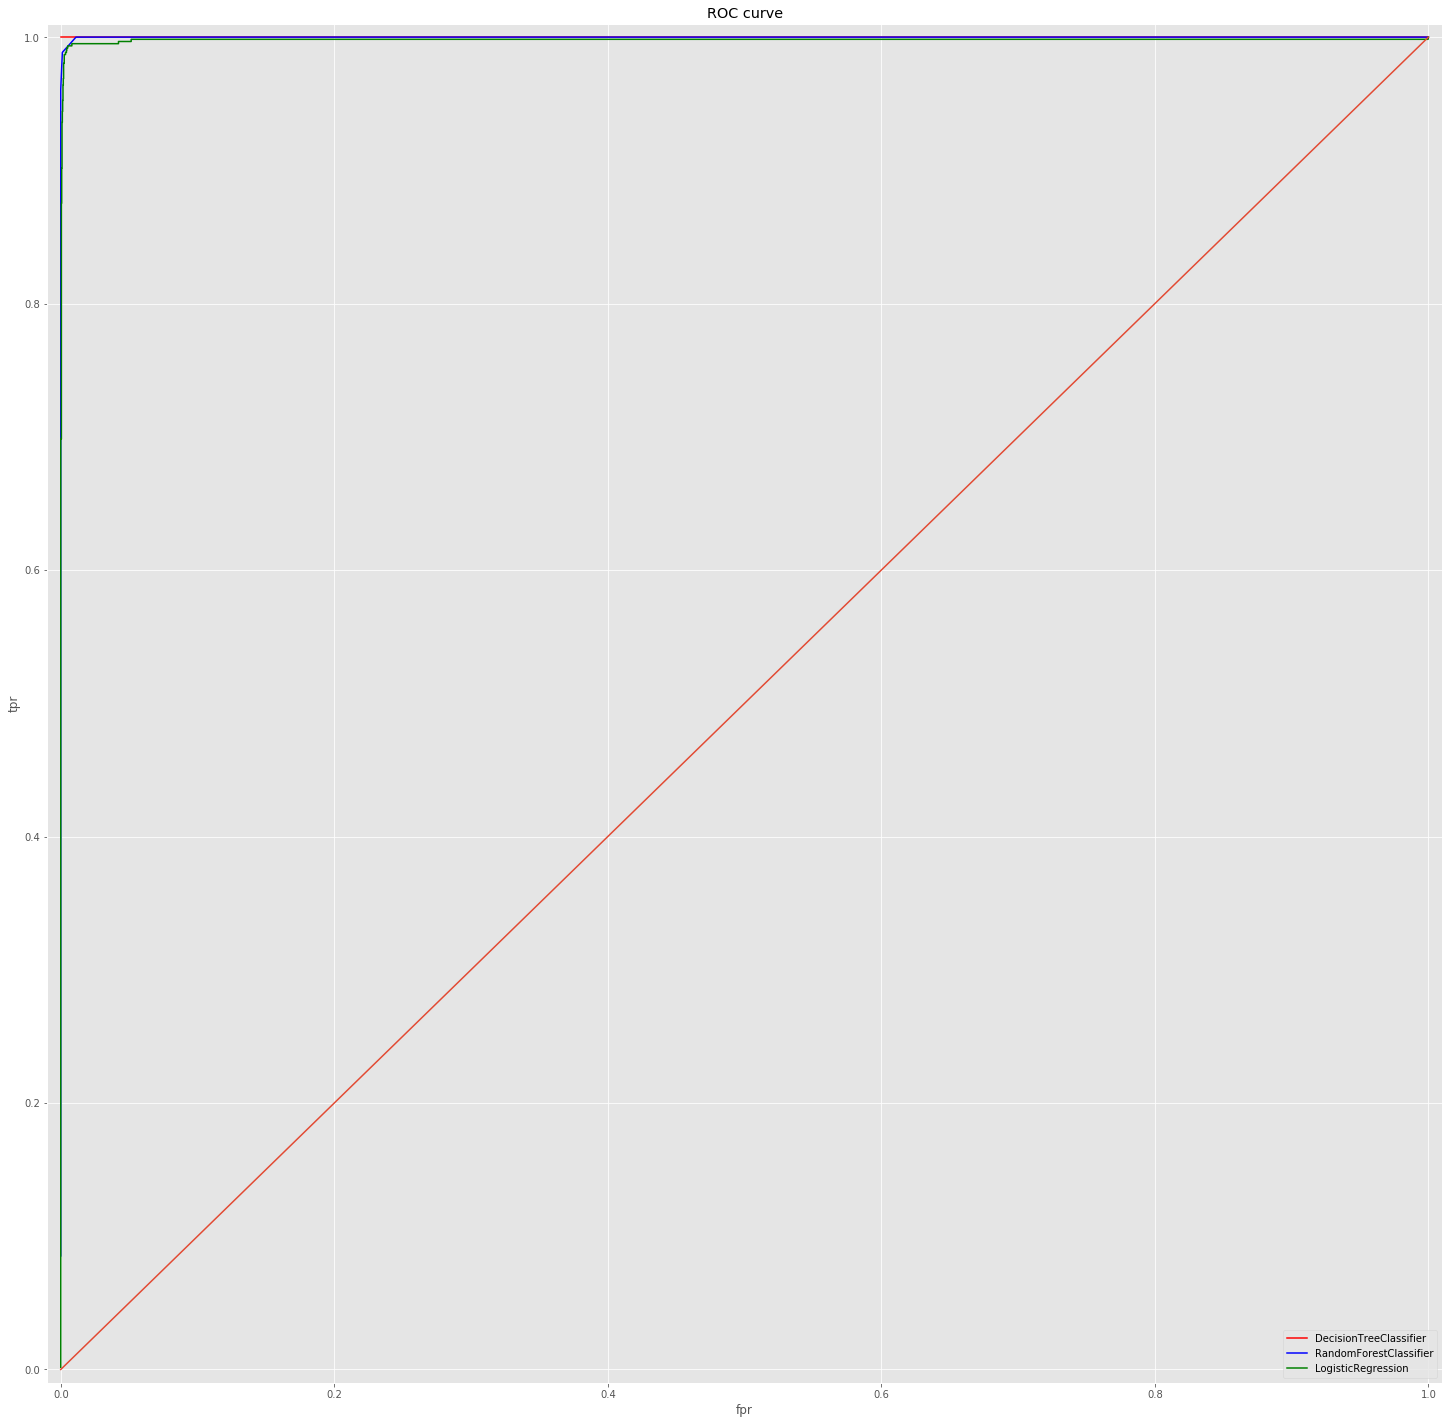

In [26]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr1, tpr1, thresholds1 = roc_curve(y_test, predict_proba1[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, predict_proba2[:,1])
fpr3, tpr3, thresholds3 = roc_curve(y_test, predict_proba3[:,1])
plt.figure(figsize=(25, 25))
plt.plot(fpr1, tpr1,'r',label='DecisionTreeClassifier')
plt.plot(fpr2, tpr2,'b',label='RandomForestClassifier')
plt.plot(fpr3, tpr3,'g',label='LogisticRegression')
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend()

print ('roc_auc для DecisionTreeClassifier', roc_auc_score(y_test, predict_proba1[:,1]))
print ('roc_auc для RandomForestClassifier', roc_auc_score(y_test, predict_proba2[:,1]))
print ('roc_auc для LogisticRegression', roc_auc_score(y_test, predict_proba3[:,1]))
## Your Code Here

In [27]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
import numpy
rfc = DecisionTreeClassifier()
a=cross_val_score(
    rfc,
    X,
    y,
    scoring='roc_auc',
    cv=10
)
rfc = RandomForestClassifier()
b=cross_val_score(
    rfc,
    X,
    y,
    scoring='roc_auc',
    cv=10
)
rfc = LogisticRegression()
c=cross_val_score(
    rfc,
    X,
    y,
    scoring='roc_auc',
    cv=10
)
print ('Кросс валидация для DecisionTreeClassifier',a)
print ('Кросс валидация для RandomForestClassifier',b)
print ('Кросс валидация для LogisticRegression',c)
print ('Среднее значение rog_auc DecisionTreeClassifier=',numpy.mean(a))
print ('Среднее значение rog_auc RandomForestClassifier=',numpy.mean(b))
print ('Среднее значение rog_auc LogisticRegression=',numpy.mean(c))



Кросс валидация для DecisionTreeClassifier [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Кросс валидация для RandomForestClassifier [0.99999009 1.         0.99998513 1.         1.         1.
 0.9999554  1.         0.99960848 0.99963285]
Кросс валидация для LogisticRegression [0.79349787 0.70708693 0.70467836 0.88101893 1.         0.87541877
 0.99670929 0.9528992  0.70047577 0.98018377]
Среднее значение rog_auc DecisionTreeClassifier= 1.0
Среднее значение rog_auc RandomForestClassifier= 0.9999171951083323
Среднее значение rog_auc LogisticRegression= 0.8591968886413186


In [31]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки
model = DecisionTreeClassifier()
model.fit(X, y)
predict = model.predict(X_test)

predict
## Your Code Here

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

roc_auc для DecisionTreeClassifier 1.0


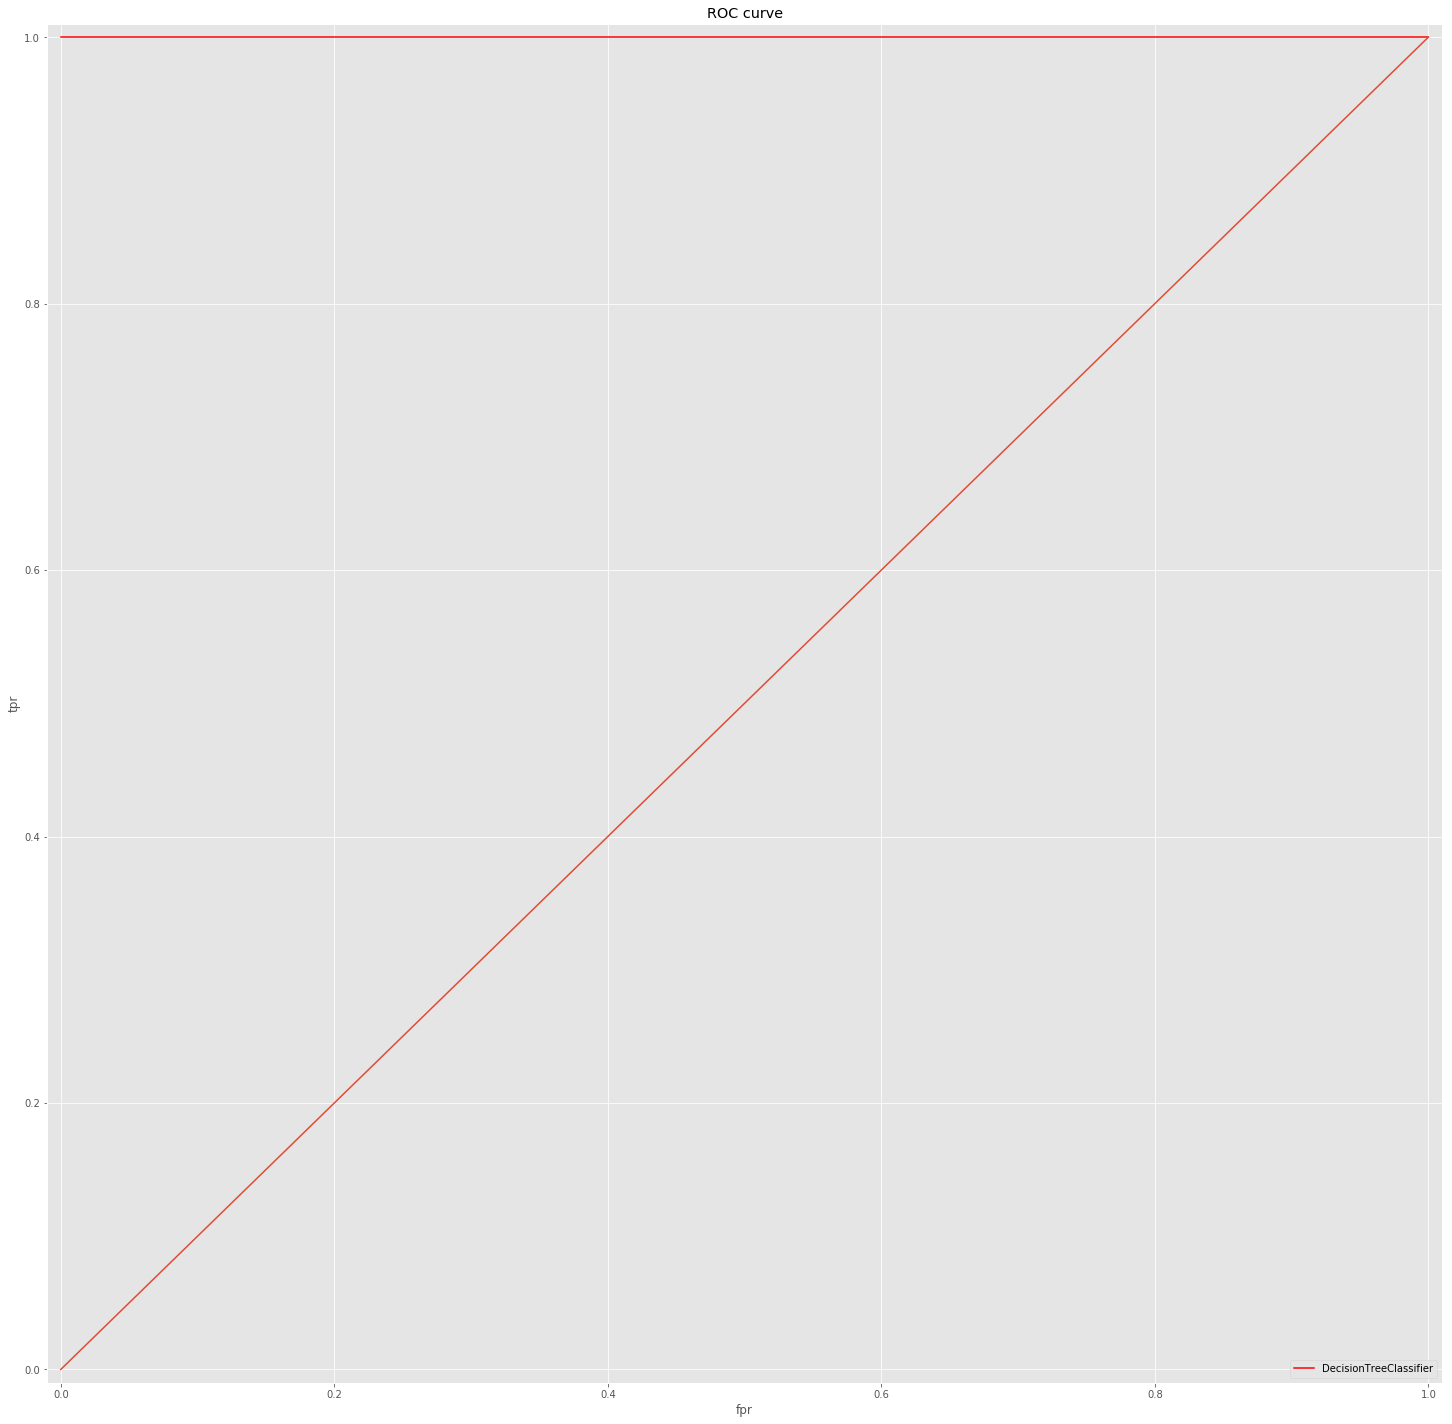

In [29]:
# Померить roc_auc на тесте
print ('roc_auc для DecisionTreeClassifier', roc_auc_score(y_test, predict))
# Вывести текстом и на графике =)
fpr, tpr, thresholds = roc_curve(y_test, predict)
plt.figure(figsize=(25, 25))
plt.plot(fpr, tpr,'r',label='DecisionTreeClassifier')
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend()
## Your Code Here

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [30]:
### И далее ;)